In [ ]:
'''
此文件记录了数据预处理代码的开发过程。
比较重要的两个cell分别是【用mark实现分割&可视化】，以及【批量预处理数据并输出为txt】。
'''

In [1]:
import os

# 打印当前工作目录
print(os.getcwd())


C:\Users\HP


In [2]:
# 更改工作目录，便于简写输入输出文件名
os.chdir(r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗')


In [6]:
# 开启交互旋转
%matplotlib notebook


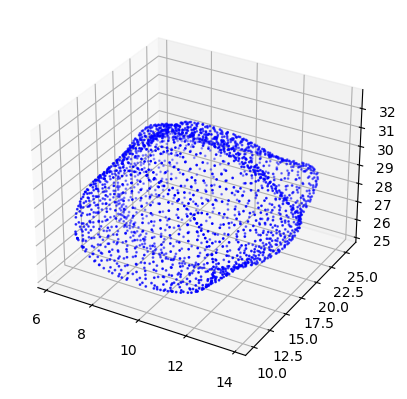

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_obj_file(file_path):
    vertices = []
    faces = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('v '):
                parts = line.strip().split()
                vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                vertices.append(vertex)
            elif line.startswith('f '):
                parts = line.strip().split()
                face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                faces.append(face)
    return vertices, faces

def load_mark_file(file_path):
    marks = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:
                vertex_index = int(parts[0])
                mark_value = parts[1]
                marks[vertex_index] = mark_value
    return marks

def plot_scene_with_marks(vertices, faces, marks):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # 绘制所有顶点
    x = [vertex[0] for vertex in vertices]
    y = [vertex[1] for vertex in vertices]
    z = [vertex[2] for vertex in vertices]
    ax.scatter(x, y, z, c='b', marker='o', s=1)

    # 绘制标记的顶点
    for vertex_index, mark_value in marks.items():
        vertex = vertices[vertex_index]
        ax.scatter(vertex[0], vertex[1], vertex[2], c='r', marker='^', s=20)

    plt.show()

obj_file_path = '1.obj'
mark_file_path = '1.obj.mark'

# obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/1.obj'
# mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/1.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)
plot_scene_with_marks(vertices, faces, marks)


<IPython.core.display.Javascript object>


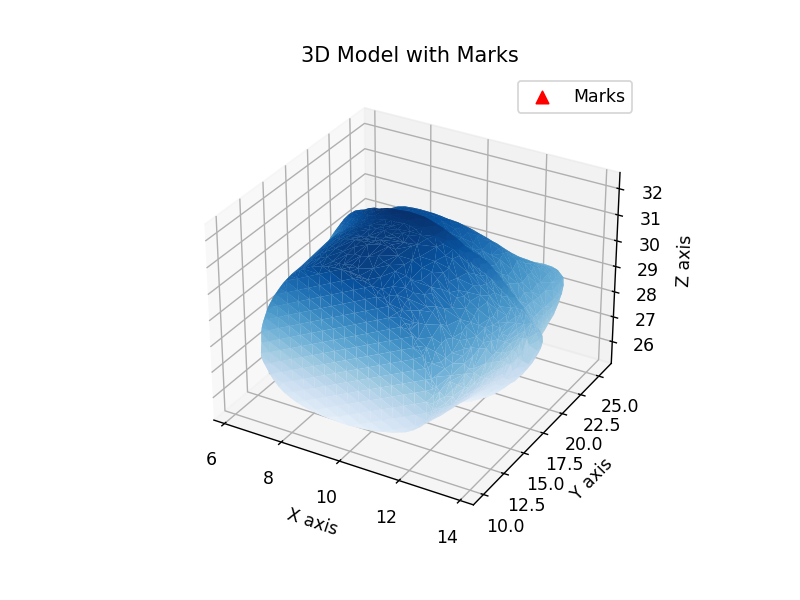

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = {}
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 2:
                    vertex_index = int(parts[0])
                    mark_value = parts[1]
                    marks[vertex_index] = mark_value
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def plot_surface_with_marks(vertices, faces, marks):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 提取顶点的坐标
    x = [vertex[0] for vertex in vertices]
    y = [vertex[1] for vertex in vertices]
    z = [vertex[2] for vertex in vertices]

    # 创建三角形面
    faces_array = np.array(faces)
    ax.plot_trisurf(x, y, z, triangles=faces_array, cmap='Blues', edgecolor='none')

    # 绘制标记的顶点
    mark_x = [vertices[i][0] for i in marks.keys()]
    mark_y = [vertices[i][1] for i in marks.keys()]
    mark_z = [vertices[i][2] for i in marks.keys()]
    ax.scatter(mark_x, mark_y, mark_z, c='r', marker='^', s=50, label='Marks')

    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Marks')

    # 添加图例
    ax.legend()

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)
plot_surface_with_marks(vertices, faces, marks)


<IPython.core.display.Javascript object>


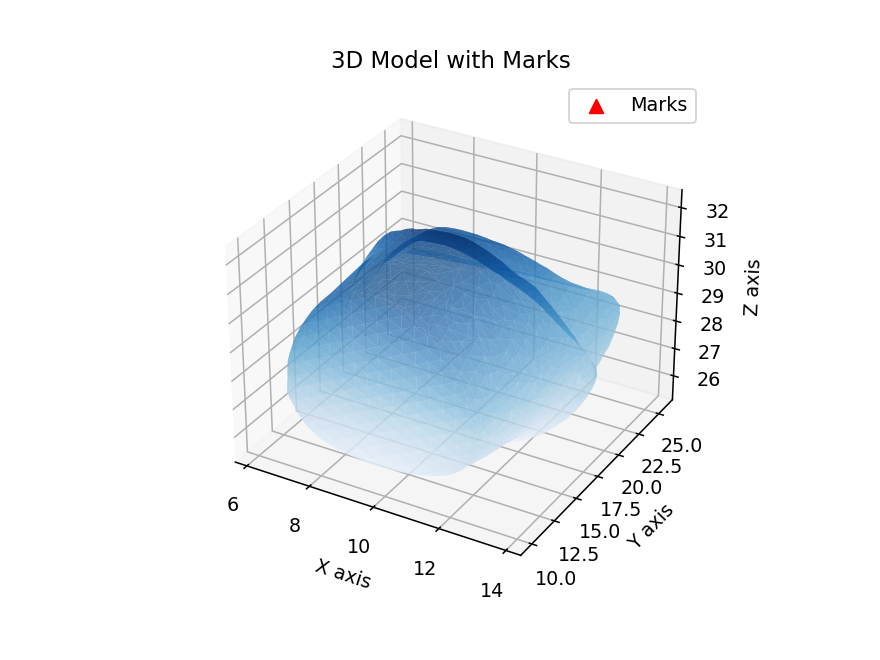

Number of vertices: 2180
Number of faces: 4356
Number of marks: 0


In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = {}
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 2:
                    vertex_index = int(parts[0])
                    mark_value = parts[1]
                    marks[vertex_index] = mark_value
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def plot_surface_with_marks(vertices, faces, marks):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 提取顶点的坐标
    x = [vertex[0] for vertex in vertices]
    y = [vertex[1] for vertex in vertices]
    z = [vertex[2] for vertex in vertices]

    # 打印顶点、面的数据和标记数量
    print(f"Number of vertices: {len(vertices)}")
    print(f"Number of faces: {len(faces)}")
    print(f"Number of marks: {len(marks)}")  # 打印标记数量

    if len(x) < 3 or len(y) < 3 or len(z) < 3:
        print("Error: Not enough vertices to create a surface.")
        return

    # 检查面数据
    faces_array = np.array(faces)
    if len(faces_array) == 0 or faces_array.shape[1] < 3:
        print("Error: Invalid face data.")
        return

    try:
        # 创建三角形面
        ax.plot_trisurf(x, y, z, triangles=faces_array, cmap='Blues', edgecolor='none', alpha=0.6)
    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 绘制标记的顶点
    mark_x = [vertices[i][0] for i in marks.keys()]
    mark_y = [vertices[i][1] for i in marks.keys()]
    mark_z = [vertices[i][2] for i in marks.keys()]
    ax.scatter(mark_x, mark_y, mark_z, c='red', marker='^', s=50, label='Marks')

    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Marks')

    # 添加图例
    ax.legend()

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)
plot_surface_with_marks(vertices, faces, marks)


<IPython.core.display.Javascript object>


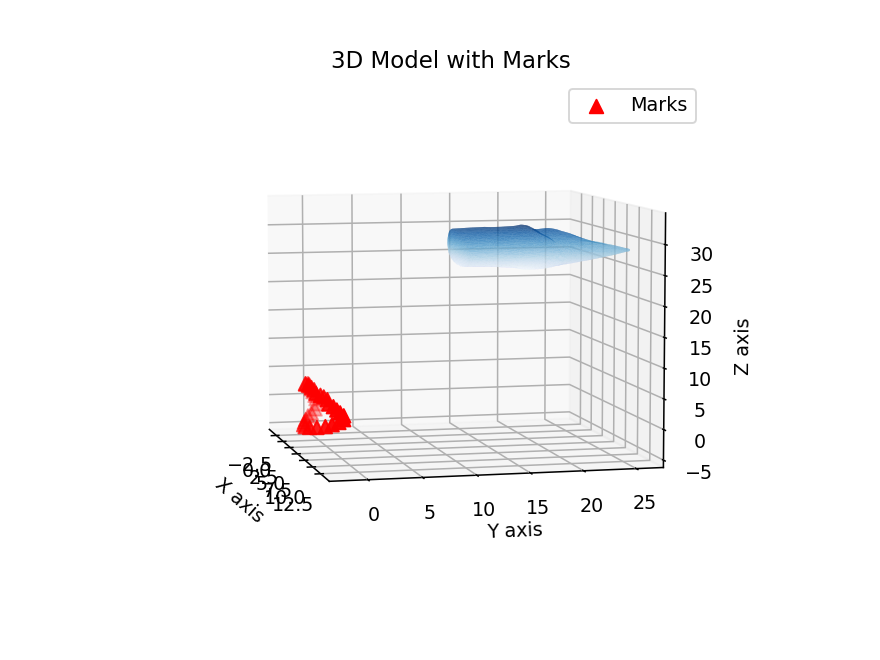

Number of vertices: 2180
Number of faces: 4356
Number of marks: 35


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def plot_surface_with_marks(vertices, faces, marks):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 提取顶点的坐标
    x = [vertex[0] for vertex in vertices]
    y = [vertex[1] for vertex in vertices]
    z = [vertex[2] for vertex in vertices]

    # 打印顶点、面的数据和标记数量
    print(f"Number of vertices: {len(vertices)}")
    print(f"Number of faces: {len(faces)}")
    print(f"Number of marks: {len(marks)}")  # 打印标记数量

    if len(x) < 3 or len(y) < 3 or len(z) < 3:
        print("Error: Not enough vertices to create a surface.")
        return

    # 检查面数据
    faces_array = np.array(faces)
    if len(faces_array) == 0 or faces_array.shape[1] < 3:
        print("Error: Invalid face data.")
        return

    try:
        # 创建三角形面
        ax.plot_trisurf(x, y, z, triangles=faces_array, cmap='Blues', edgecolor='none', alpha=0.6)
    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 绘制标记的顶点
    mark_x = [mark[0] for mark in marks]
    mark_y = [mark[1] for mark in marks]
    mark_z = [mark[2] for mark in marks]
    ax.scatter(mark_x, mark_y, mark_z, c='red', marker='^', s=50, label='Marks')

    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Marks')

    # 添加图例
    ax.legend()

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)
plot_surface_with_marks(vertices, faces, marks)


<IPython.core.display.Javascript object>


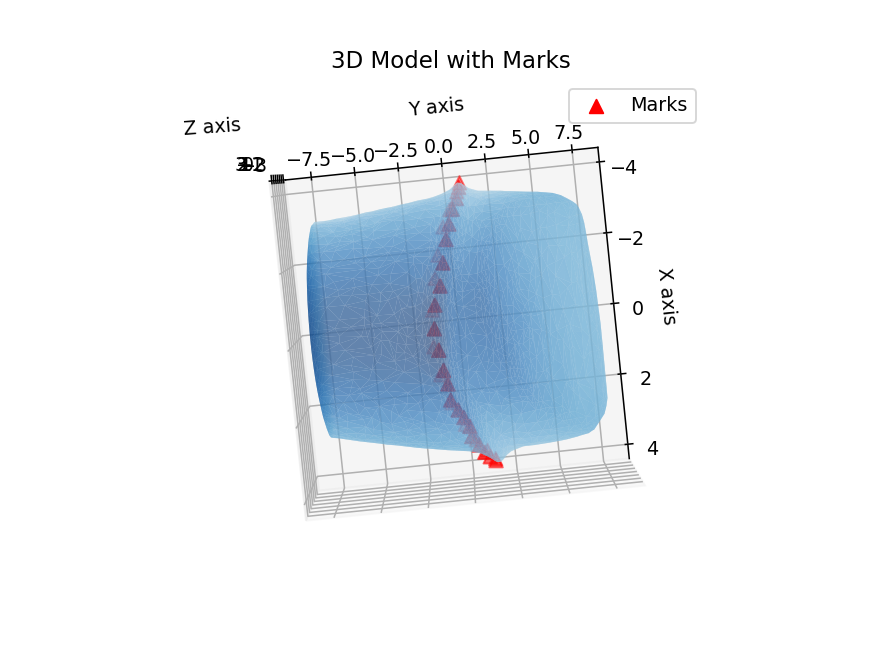

Number of vertices: 2180
Number of faces: 4356
Number of marks: 35


In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def plot_surface_with_marks(vertices, faces, marks):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 提取顶点的坐标
    x = [vertex[0] for vertex in vertices]
    y = [vertex[1] for vertex in vertices]
    z = [vertex[2] for vertex in vertices]

    # 打印顶点、面的数据和标记数量
    print(f"Number of vertices: {len(vertices)}")
    print(f"Number of faces: {len(faces)}")
    print(f"Number of marks: {len(marks)}")  # 打印标记数量

    if len(x) < 3 or len(y) < 3 or len(z) < 3:
        print("Error: Not enough vertices to create a surface.")
        return

    # 检查面数据
    faces_array = np.array(faces)
    if len(faces_array) == 0 or faces_array.shape[1] < 3:
        print("Error: Invalid face data.")
        return

    try:
        # 创建三角形面
        ax.plot_trisurf(x, y, z, triangles=faces_array, cmap='Blues', edgecolor='none', alpha=0.6)
    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 绘制标记的顶点
    mark_x = [mark[0] for mark in marks]
    mark_y = [mark[1] for mark in marks]
    mark_z = [mark[2] for mark in marks]
    ax.scatter(mark_x, mark_y, mark_z, c='red', marker='^', s=50, label='Marks')

    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Marks')

    # 添加图例
    ax.legend()

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)

# 将顶点坐标平移至包围盒中心
centered_vertices = center_vertices(vertices)

plot_surface_with_marks(centered_vertices, faces, marks)


<IPython.core.display.Javascript object>


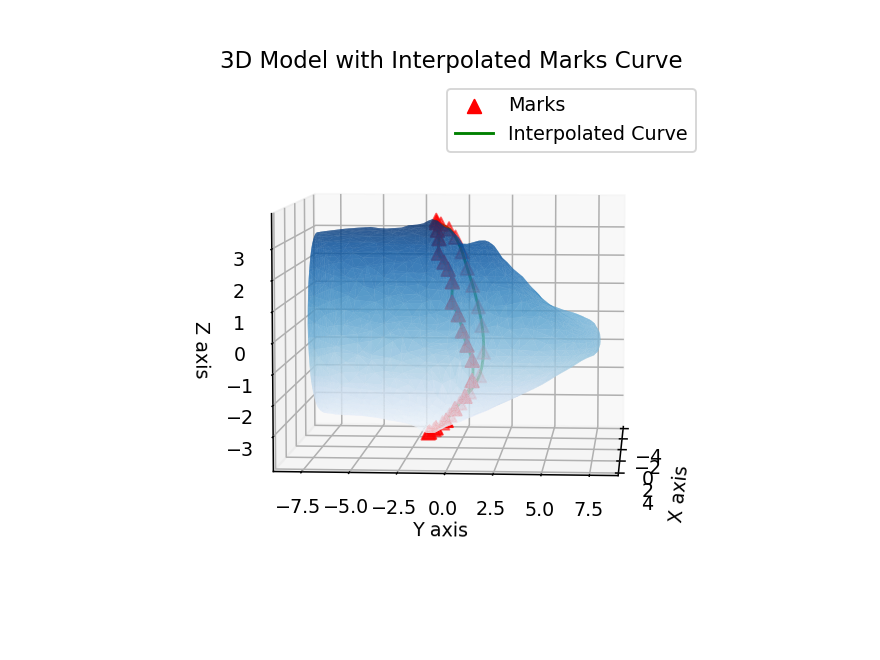

Number of vertices: 2180
Number of faces: 4356
Number of marks: 35


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import splprep, splev

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # 添加第一个点到最后，使曲线闭合
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return interpolated_marks

def plot_surface_with_marks(vertices, faces, marks):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 提取顶点的坐标
    x = [vertex[0] for vertex in vertices]
    y = [vertex[1] for vertex in vertices]
    z = [vertex[2] for vertex in vertices]

    # 打印顶点、面的数据和标记数量
    print(f"Number of vertices: {len(vertices)}")
    print(f"Number of faces: {len(faces)}")
    print(f"Number of marks: {len(marks)}")  # 打印标记数量

    if len(x) < 3 or len(y) < 3 or len(z) < 3:
        print("Error: Not enough vertices to create a surface.")
        return

    # 检查面数据
    faces_array = np.array(faces)
    if len(faces_array) == 0 or faces_array.shape[1] < 3:
        print("Error: Invalid face data.")
        return

    try:
        # 创建三角形面
        ax.plot_trisurf(x, y, z, triangles=faces_array, cmap='Blues', edgecolor='none', alpha=0.6)
    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 绘制标记的顶点
    mark_x = [mark[0] for mark in marks]
    mark_y = [mark[1] for mark in marks]
    mark_z = [mark[2] for mark in marks]
    ax.scatter(mark_x, mark_y, mark_z, c='red', marker='^', s=50, label='Marks')

    # 插值标记点并绘制曲线
    interpolated_marks = interpolate_marks(marks)
    ax.plot(interpolated_marks[0], interpolated_marks[1], interpolated_marks[2], c='green', label='Interpolated Curve')

    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Interpolated Marks Curve')

    # 添加图例
    ax.legend()

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)

# 将顶点坐标平移至包围盒中心
centered_vertices = center_vertices(vertices)

plot_surface_with_marks(centered_vertices, faces, marks)


<IPython.core.display.Javascript object>


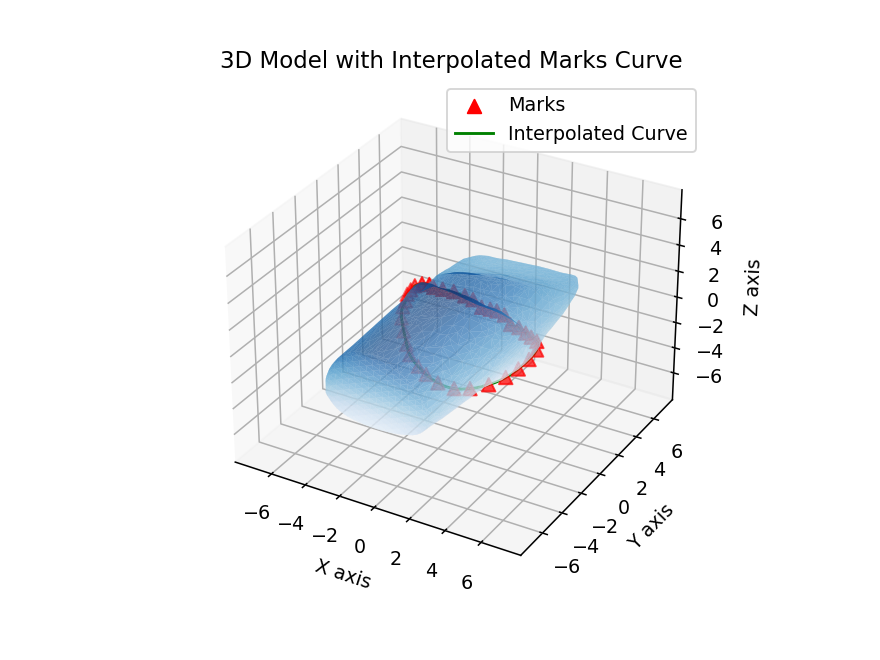

Number of vertices: 2180
Number of faces: 4356
Number of marks: 35


In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import splprep, splev

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # 添加第一个点到最后，使曲线闭合
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return interpolated_marks

def plot_surface_with_marks(vertices, faces, marks):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 提取顶点的坐标
    x = [vertex[0] for vertex in vertices]
    y = [vertex[1] for vertex in vertices]
    z = [vertex[2] for vertex in vertices]

    # 打印顶点、面的数据和标记数量
    print(f"Number of vertices: {len(vertices)}")
    print(f"Number of faces: {len(faces)}")
    print(f"Number of marks: {len(marks)}")  # 打印标记数量

    if len(x) < 3 or len(y) < 3 or len(z) < 3:
        print("Error: Not enough vertices to create a surface.")
        return

    # 检查面数据
    faces_array = np.array(faces)
    if len(faces_array) == 0 or faces_array.shape[1] < 3:
        print("Error: Invalid face data.")
        return

    try:
        # 创建三角形面
        ax.plot_trisurf(x, y, z, triangles=faces_array, cmap='Blues', edgecolor='none', alpha=0.6)
    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 绘制标记的顶点
    mark_x = [mark[0] for mark in marks]
    mark_y = [mark[1] for mark in marks]
    mark_z = [mark[2] for mark in marks]
    ax.scatter(mark_x, mark_y, mark_z, c='red', marker='^', s=50, label='Marks')

    # 插值标记点并绘制曲线
    interpolated_marks = interpolate_marks(marks)
    ax.plot(interpolated_marks[0], interpolated_marks[1], interpolated_marks[2], c='green', label='Interpolated Curve')

    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Interpolated Marks Curve')

    # 添加图例
    ax.legend()

    # 确保坐标轴刻度一致
    max_range = np.array([max(x)-min(x), max(y)-min(y), max(z)-min(z)]).max()
    mid_x = (max(x) + min(x)) * 0.5
    mid_y = (max(y) + min(y)) * 0.5
    mid_z = (max(z) + min(z)) * 0.5
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)

# 将顶点坐标平移至包围盒中心
centered_vertices = center_vertices(vertices)

plot_surface_with_marks(centered_vertices, faces, marks)


Segmentation failed: Only one connected component found after removing inside points.
Number of vertices in part 1: 0
Number of vertices in part 2: 0
Number of inside points: 97


<IPython.core.display.Javascript object>


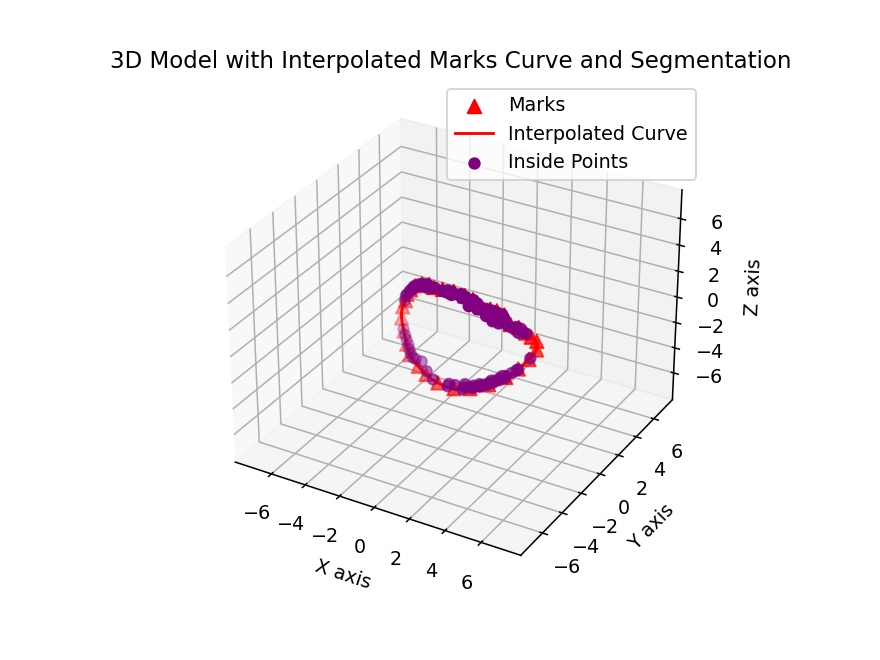

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx
import matplotlib.path as mplPath

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # 添加第一个点到最后，使曲线闭合
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_inside_polygon(point, polygon):
    path = mplPath.Path(polygon)
    return path.contains_point(point)

def segment_point_cloud(vertices, faces, interpolated_marks):
    G = generate_graph(vertices, faces)
    polygon = np.array(interpolated_marks)
    
    # 找到封闭曲线内的顶点
    inside_points = set()
    for i, vertex in enumerate(vertices):
        if is_inside_polygon(vertex[:2], polygon[:, :2]):
            inside_points.add(i)
    
    # print(f"Number of inside points: {len(inside_points)}")
    
    # 从图中删除封闭曲线上的点
    G.remove_nodes_from(inside_points)
    
    # 使用图的连通性找到两个区域
    components = list(nx.connected_components(G))
    part1 = set()
    part2 = set()
    
    if len(components) > 1:
        part1 = components[0]
        part2 = components[1]
    else:
        # 如果只有一个连通分量，那么分割失败
        print("Segmentation failed: Only one connected component found after removing inside points.")
    
    return part1, part2, inside_points

def plot_surface_with_marks(vertices, faces, marks, part1, part2, inside_points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    vertices = np.array(vertices)
    faces = np.array(faces)
    
    x, y, z = vertices.T

    try:
        # 标记分割的点云部分
        part1_faces = [face for face in faces if set(face) & part1]
        part2_faces = [face for face in faces if set(face) & part2]
        
        part1_faces = np.array(part1_faces)
        part2_faces = np.array(part2_faces)
        
        if len(part1_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part1_faces, color='blue', alpha=0.6)
        if len(part2_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part2_faces, color='green', alpha=0.6)

    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 绘制标记的顶点
    mark_x = [mark[0] for mark in marks]
    mark_y = [mark[1] for mark in marks]
    mark_z = [mark[2] for mark in marks]
    ax.scatter(mark_x, mark_y, mark_z, c='red', marker='^', s=50, label='Marks')

    # 插值标记点并绘制曲线
    interpolated_marks = interpolate_marks(marks)
    ax.plot(interpolated_marks[:, 0], interpolated_marks[:, 1], interpolated_marks[:, 2], c='red', label='Interpolated Curve')

    # 绘制封闭曲线上的点
    inside_x = [vertices[i][0] for i in inside_points]
    inside_y = [vertices[i][1] for i in inside_points]
    inside_z = [vertices[i][2] for i in inside_points]
    ax.scatter(inside_x, inside_y, inside_z, c='purple', marker='o', s=30, label='Inside Points')

    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Interpolated Marks Curve and Segmentation')

    # 添加图例
    ax.legend()

    # 确保坐标轴刻度一致
    max_range = np.array([max(x)-min(x), max(y)-min(y), max(z)-min(z)]).max()
    mid_x = (max(x) + min(x)) * 0.5
    mid_y = (max(y) + min(y)) * 0.5
    mid_z = (max(z) + min(z)) * 0.5
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)

# 将顶点坐标平移至包围盒中心
centered_vertices = center_vertices(vertices)

# 获取插值后的标记点
interpolated_marks = interpolate_marks(marks)

# 分割点云
part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

# 输出每个部分的点数
print(f"Number of vertices in part 1: {len(part1)}")
print(f"Number of vertices in part 2: {len(part2)}")
print(f"Number of inside points: {len(inside_points)}")

plot_surface_with_marks(centered_vertices, faces, marks, part1, part2, inside_points)


Number of inside points: 164
Number of vertices in part 1: 1035
Number of vertices in part 2: 1008


<IPython.core.display.Javascript object>


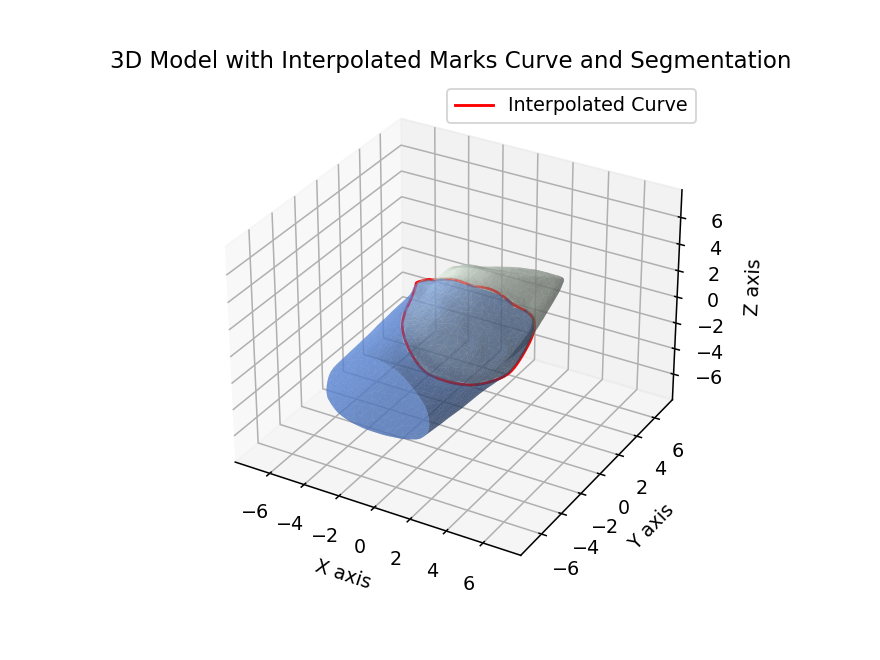

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # 添加第一个点到最后，使曲线闭合
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance=2e-1):
    # 可以把tolerance改成自适应的，以保证它对每颗牙齿都能有效
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    G = generate_graph(vertices, faces)
    curve_points = np.array(interpolated_marks)
    
    # 找到封闭曲线上的顶点
    curve_points_indices = set()
    for i, vertex in enumerate(vertices):
        if is_on_curve(np.array(vertex), curve_points):
            curve_points_indices.add(i)
    
    print(f"Number of inside points: {len(curve_points_indices)}")
    
    # 从图中删除封闭曲线上的点
    G.remove_nodes_from(curve_points_indices)
    
    # 使用图的连通性找到两个区域
    components = list(nx.connected_components(G))
    part1 = set()
    part2 = set()
    
    if len(components) > 1:
        part1 = components[0]
        part2 = components[1]
    else:
        # 如果只有一个连通分量，那么分割失败
        print("Segmentation failed: Only one connected component found after removing curve points.")
    
    return part1, part2, curve_points_indices

def plot_surface_with_marks(vertices, faces, marks, part1, part2, inside_points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    vertices = np.array(vertices)
    faces = np.array(faces)
    
    x, y, z = vertices.T

    try:
        # 标记分割的点云部分
        part1_faces = [face for face in faces if set(face) & part1]
        part2_faces = [face for face in faces if set(face) & part2]
        
        part1_faces = np.array(part1_faces)
        part2_faces = np.array(part2_faces)
        
        if len(part1_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part1_faces, color='cornflowerblue', alpha=0.6)
        if len(part2_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part2_faces, color='honeydew', alpha=0.6)

    except ValueError as e:
        print(f"ValueError: {e}")
        return

    '''
    # 绘制标记的顶点
    mark_x = [mark[0] for mark in marks]
    mark_y = [mark[1] for mark in marks]
    mark_z = [mark[2] for mark in marks]
    ax.scatter(mark_x, mark_y, mark_z, c='red', marker='^', s=50, label='Marks')
    '''
    
    # 插值标记点并绘制曲线
    interpolated_marks = interpolate_marks(marks)
    ax.plot(interpolated_marks[:, 0], interpolated_marks[:, 1], interpolated_marks[:, 2], c='red', label='Interpolated Curve')
    
    '''
    # 绘制封闭曲线上的点
    inside_x = [vertices[i][0] for i in inside_points]
    inside_y = [vertices[i][1] for i in inside_points]
    inside_z = [vertices[i][2] for i in inside_points]
    ax.scatter(inside_x, inside_y, inside_z, c='red', marker='.', s=30, label='External Neck Line')
    '''

    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Interpolated Marks Curve and Segmentation')

    # 添加图例
    ax.legend()

    # 确保坐标轴刻度一致
    max_range = np.array([max(x)-min(x), max(y)-min(y), max(z)-min(z)]).max()
    mid_x = (max(x) + min(x)) * 0.5
    mid_y = (max(y) + min(y)) * 0.5
    mid_z = (max(z) + min(z)) * 0.5
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)

# 将顶点坐标平移至包围盒中心
centered_vertices = center_vertices(vertices)

# 获取插值后的标记点
interpolated_marks = interpolate_marks(marks)

# 分割点云
part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

# 输出每个部分的点数
print(f"Number of vertices in part 1: {len(part1)}")
print(f"Number of vertices in part 2: {len(part2)}")

plot_surface_with_marks(centered_vertices, faces, marks, part1, part2, inside_points)


Number of inside points: 158
Number of vertices in part 1: 997
Number of vertices in part 2: 1025


<IPython.core.display.Javascript object>


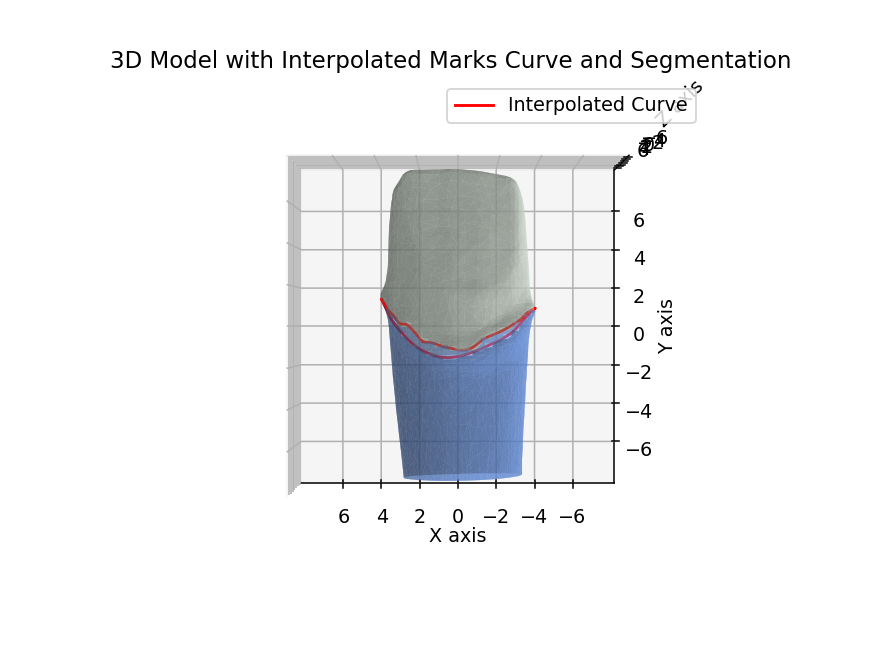

In [88]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # 添加第一个点到最后，使曲线闭合
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance=2e-1):
    # 可以把tolerance改成自适应的，以保证它对每颗牙齿都能有效
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    G = generate_graph(vertices, faces)
    curve_points = np.array(interpolated_marks)
    
    # 找到封闭曲线上的顶点
    curve_points_indices = set()
    for i, vertex in enumerate(vertices):
        if is_on_curve(np.array(vertex), curve_points):
            curve_points_indices.add(i)
    
    print(f"Number of inside points: {len(curve_points_indices)}")
    
    # 从图中删除封闭曲线上的点
    G.remove_nodes_from(curve_points_indices)
    
    # 使用图的连通性找到两个区域
    components = list(nx.connected_components(G))
    part1 = set()
    part2 = set()
    
    if len(components) > 1:
        part1 = components[0]
        part2 = components[1]
    else:
        # 如果只有一个连通分量，那么分割失败
        print("Segmentation failed: Only one connected component found after removing curve points.")
    
    return part1, part2, curve_points_indices

def plot_surface_with_marks(vertices, faces, marks, part1, part2, inside_points, azim=45, elev=30):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    vertices = np.array(vertices)
    faces = np.array(faces)
    
    x, y, z = vertices.T

    try:
        # 标记分割的点云部分
        part1_faces = [face for face in faces if set(face) & part1]
        part2_faces = [face for face in faces if set(face) & part2]
        
        part1_faces = np.array(part1_faces)
        part2_faces = np.array(part2_faces)
        
        if len(part1_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part1_faces, color='cornflowerblue', alpha=0.6)
        if len(part2_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part2_faces, color='honeydew', alpha=0.6)

    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 插值标记点并绘制曲线
    interpolated_marks = interpolate_marks(marks)
    ax.plot(interpolated_marks[:, 0], interpolated_marks[:, 1], interpolated_marks[:, 2], c='red', label='Interpolated Curve')
    
    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Interpolated Marks Curve and Segmentation')

    # 设置视角
    ax.view_init(elev=elev, azim=azim)

    # 添加图例
    ax.legend()

    # 确保坐标轴刻度一致
    max_range = np.array([max(x)-min(x), max(y)-min(y), max(z)-min(z)]).max()
    mid_x = (max(x) + min(x)) * 0.5
    mid_y = (max(y) + min(y)) * 0.5
    mid_z = (max(z) + min(z)) * 0.5
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/1.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)

# 将顶点坐标平移至包围盒中心
centered_vertices = center_vertices(vertices)

# 获取插值后的标记点
interpolated_marks = interpolate_marks(marks)

# 分割点云
part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

# 输出每个部分的点数
print(f"Number of vertices in part 1: {len(part1)}")
print(f"Number of vertices in part 2: {len(part2)}")

# 调整视角参数 (azim: 方位角, elev: 仰视角)
plot_surface_with_marks(centered_vertices, faces, marks, part1, part2, inside_points, azim=90, elev=-90)


Trying with tolerance: 0.1
Number of inside points: 52
Trying with tolerance: 0.12000000000000001
Number of inside points: 77
Trying with tolerance: 0.14
Number of inside points: 99
Trying with tolerance: 0.16
Number of inside points: 135
Trying with tolerance: 0.18
Number of inside points: 149
Number of vertices in part 1: 1042
Number of vertices in part 2: 1016


<IPython.core.display.Javascript object>


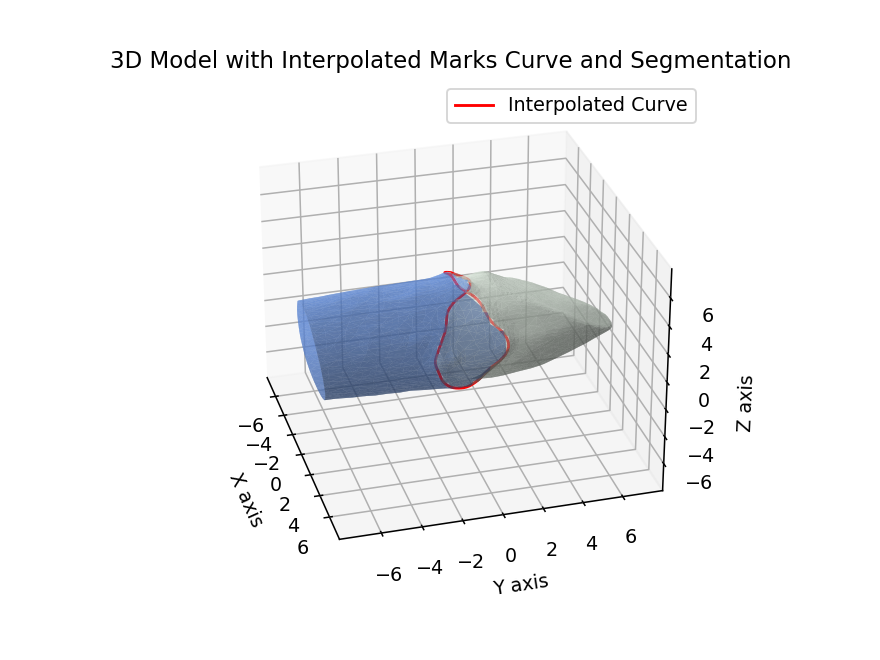

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # 添加第一个点到最后，使曲线闭合
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # 找到封闭曲线上的顶点
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        print(f"Trying with tolerance: {tolerance}")
        print(f"Number of inside points: {len(curve_points_indices)}")
        
        # 从图中删除封闭曲线上的点
        G.remove_nodes_from(curve_points_indices)
        
        # 使用图的连通性找到两个区域
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def plot_surface_with_marks(vertices, faces, marks, part1, part2, inside_points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    vertices = np.array(vertices)
    faces = np.array(faces)
    
    x, y, z = vertices.T

    try:
        # 标记分割的点云部分
        part1_faces = [face for face in faces if set(face) & part1]
        part2_faces = [face for face in faces if set(face) & part2]
        
        part1_faces = np.array(part1_faces)
        part2_faces = np.array(part2_faces)
        
        if len(part1_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part1_faces, color='cornflowerblue', alpha=0.6)
        if len(part2_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part2_faces, color='honeydew', alpha=0.6)

    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 插值标记点并绘制曲线
    interpolated_marks = interpolate_marks(marks)
    ax.plot(interpolated_marks[:, 0], interpolated_marks[:, 1], interpolated_marks[:, 2], c='red', label='Interpolated Curve')
    
    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Interpolated Marks Curve and Segmentation')

    # 添加图例
    ax.legend()

    # 确保坐标轴刻度一致
    max_range = np.array([max(x)-min(x), max(y)-min(y), max(z)-min(z)]).max()
    mid_x = (max(x) + min(x)) * 0.5
    mid_y = (max(y) + min(y)) * 0.5
    mid_z = (max(z) + min(z)) * 0.5
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)

# 将顶点坐标平移至包围盒中心
centered_vertices = center_vertices(vertices)

# 获取插值后的标记点
interpolated_marks = interpolate_marks(marks)

# 分割点云
part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

# 输出每个部分的点数
print(f"Number of vertices in part 1: {len(part1)}")
print(f"Number of vertices in part 2: {len(part2)}")

plot_surface_with_marks(centered_vertices, faces, marks, part1, part2, inside_points)


Trying with tolerance: 0.1
Number of inside points: 52
Trying with tolerance: 0.12000000000000001
Number of inside points: 77
Trying with tolerance: 0.14
Number of inside points: 99
Trying with tolerance: 0.16
Number of inside points: 135
Trying with tolerance: 0.18
Number of inside points: 149
Number of vertices in part 1: 1042
Number of vertices in part 2: 1016


<IPython.core.display.Javascript object>


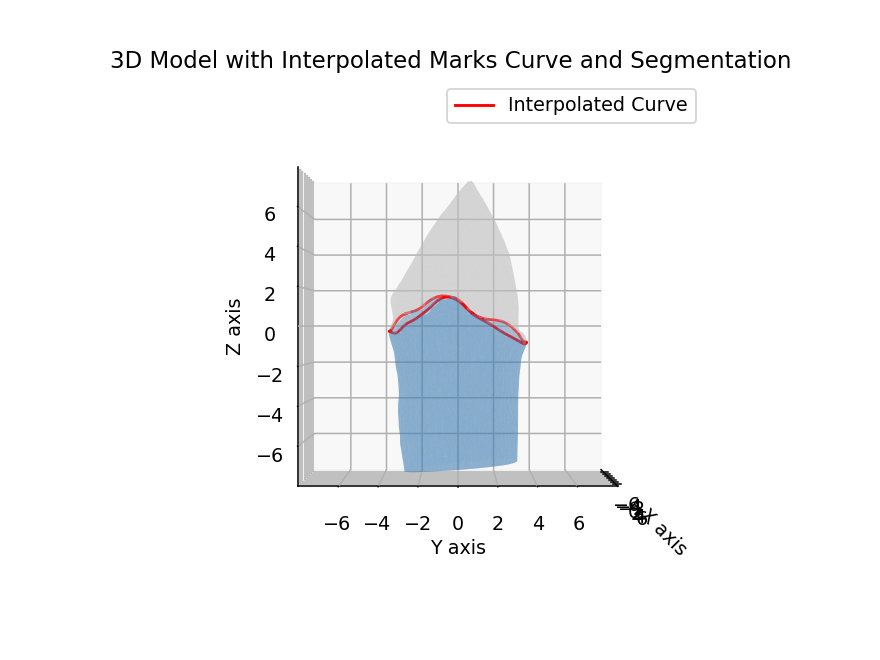

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # 添加第一个点到最后，使曲线闭合
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # 找到封闭曲线上的顶点
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        print(f"Trying with tolerance: {tolerance}")
        print(f"Number of inside points: {len(curve_points_indices)}")
        
        # 从图中删除封闭曲线上的点
        G.remove_nodes_from(curve_points_indices)
        
        # 使用图的连通性找到两个区域
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def rotate_point_cloud(vertices, angle_x, angle_y, angle_z):
    # 旋转矩阵计算
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(angle_x), -np.sin(angle_x)],
                   [0, np.sin(angle_x), np.cos(angle_x)]])

    Ry = np.array([[np.cos(angle_y), 0, np.sin(angle_y)],
                   [0, 1, 0],
                   [-np.sin(angle_y), 0, np.cos(angle_y)]])

    Rz = np.array([[np.cos(angle_z), -np.sin(angle_z), 0],
                   [np.sin(angle_z), np.cos(angle_z), 0],
                   [0, 0, 1]])

    R = Rz @ Ry @ Rx
    rotated_vertices = np.dot(vertices, R.T)
    return rotated_vertices

def plot_surface_with_marks(vertices, faces, marks, part1, part2, inside_points, azim=0, elev=0, roll=0):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 旋转点云
    vertices = np.array(vertices)
    rotated_vertices = rotate_point_cloud(vertices, np.deg2rad(roll), np.deg2rad(elev), np.deg2rad(azim))

    faces = np.array(faces)
    x, y, z = rotated_vertices.T

    try:
        # 标记分割的点云部分
        part1_faces = [face for face in faces if set(face) & part1]
        part2_faces = [face for face in faces if set(face) & part2]
        
        part1_faces = np.array(part1_faces)
        part2_faces = np.array(part2_faces)
        
        if len(part1_faces) > 0:
            ax.add_collection3d(Poly3DCollection(rotated_vertices[part1_faces], facecolors='steelblue', alpha=0.4))
        if len(part2_faces) > 0:
            ax.add_collection3d(Poly3DCollection(rotated_vertices[part2_faces], facecolors='silver', alpha=0.4))

    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 插值标记点并绘制曲线
    interpolated_marks = interpolate_marks(marks)
    rotated_marks = rotate_point_cloud(np.array(interpolated_marks), np.deg2rad(roll), np.deg2rad(elev), np.deg2rad(azim))
    ax.plot(rotated_marks[:, 0], rotated_marks[:, 1], rotated_marks[:, 2], c='red', label='Interpolated Curve')

    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Interpolated Marks Curve and Segmentation')

    # 设置视角
    ax.view_init(elev=elev, azim=azim)
    ax.set_proj_type('persp')

    # 添加图例
    ax.legend()

    # 确保坐标轴刻度一致
    max_range = np.array([max(x)-min(x), max(y)-min(y), max(z)-min(z)]).max()
    mid_x = (max(x) + min(x)) * 0.5
    mid_y = (max(y) + min(y)) * 0.5
    mid_z = (max(z) + min(z)) * 0.5
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

    # 设置坐标轴比例相等
    ax.set_box_aspect([1, 1, 1])  # Aspect ratio is 1:1:1

    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)

# 将顶点坐标平移至包围盒中心
centered_vertices = center_vertices(vertices)

# 获取插值后的标记点
interpolated_marks = interpolate_marks(marks)

# 分割点云
part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

# 输出每个部分的点数
print(f"Number of vertices in part 1: {len(part1)}")
print(f"Number of vertices in part 2: {len(part2)}")

# 调整视角参数 (azim: 方位角, elev: 仰视角, roll: 滚转角)
plot_surface_with_marks(centered_vertices, faces, marks, part1, part2, inside_points, azim=0, elev=0, roll=90)


Trying with tolerance: 0.1
Number of inside points: 52
Trying with tolerance: 0.12000000000000001
Number of inside points: 77
Trying with tolerance: 0.14
Number of inside points: 99
Trying with tolerance: 0.16
Number of inside points: 135
Trying with tolerance: 0.18
Number of inside points: 149
Number of vertices in part 1: 1042
Number of vertices in part 2: 1016


<IPython.core.display.Javascript object>


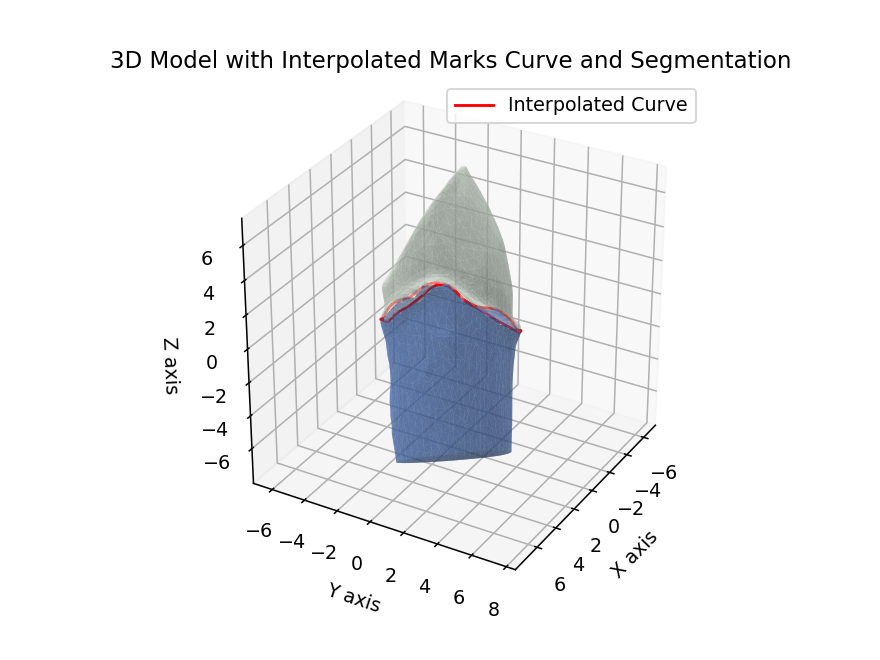

In [42]:
'''
稳定版数据可视化代码。
'''

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # 添加第一个点到最后，使曲线闭合
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # 找到封闭曲线上的顶点
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        print(f"Trying with tolerance: {tolerance}")
        print(f"Number of inside points: {len(curve_points_indices)}")
        
        # 从图中删除封闭曲线上的点
        G.remove_nodes_from(curve_points_indices)
        
        # 使用图的连通性找到两个区域
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def rotate_points(points, angles):
    """ Rotate points by angles in radians around x, y, z axes. """
    x_angle, y_angle, z_angle = angles

    # Rotation matrices
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(x_angle), -np.sin(x_angle)],
        [0, np.sin(x_angle), np.cos(x_angle)]
    ])

    Ry = np.array([
        [np.cos(y_angle), 0, np.sin(y_angle)],
        [0, 1, 0],
        [-np.sin(y_angle), 0, np.cos(y_angle)]
    ])

    Rz = np.array([
        [np.cos(z_angle), -np.sin(z_angle), 0],
        [np.sin(z_angle), np.cos(z_angle), 0],
        [0, 0, 1]
    ])

    # Combined rotation matrix
    R = Rz @ Ry @ Rx
    return points @ R.T

def plot_surface_with_marks(vertices, faces, marks, part1, part2, inside_points, angles=(0, 0, 0)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    vertices = np.array(vertices)
    faces = np.array(faces)

    # Apply rotation
    vertices = rotate_points(vertices, angles)

    x, y, z = vertices.T

    try:
        # 标记分割的点云部分
        part1_faces = [face for face in faces if set(face) & part1]
        part2_faces = [face for face in faces if set(face) & part2]
        
        part1_faces = np.array(part1_faces)
        part2_faces = np.array(part2_faces)
        
        if len(part1_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part1_faces, color='cornflowerblue', alpha=0.6)
        if len(part2_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part2_faces, color='honeydew', alpha=0.6)

    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 插值标记点并绘制曲线
    interpolated_marks = interpolate_marks(marks)
    interpolated_marks = rotate_points(interpolated_marks, angles)
    ax.plot(interpolated_marks[:, 0], interpolated_marks[:, 1], interpolated_marks[:, 2], c='red', label='Interpolated Curve')
    
    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Interpolated Marks Curve and Segmentation')

    # 添加图例
    ax.legend()

    # 确保坐标轴刻度一致
    max_range = np.array([max(x)-min(x), max(y)-min(y), max(z)-min(z)]).max()
    mid_x = (max(x) + min(x)) * 0.5
    mid_y = (max(y) + min(y)) * 0.5
    mid_z = (max(z) + min(z)) * 0.5
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

    # 设置视角
    ax.view_init(elev=30, azim=30)  # This will be overridden by rotation

    # 确保坐标轴比例相等
    ax.set_box_aspect([1,1,1])  # Aspect ratio is 1:1:1

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)

# 将顶点坐标平移至包围盒中心
centered_vertices = center_vertices(vertices)

# 获取插值后的标记点
interpolated_marks = interpolate_marks(marks)

# 分割点云
part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

# 输出每个部分的点数
print(f"Number of vertices in part 1: {len(part1)}")
print(f"Number of vertices in part 2: {len(part2)}")

# 调整视角 (angles in radians)
plot_surface_with_marks(centered_vertices, faces, marks, part1, part2, inside_points, angles=(np.radians(90), np.radians(-30), np.radians(30)))


Trying with tolerance: 0.1
Number of inside points: 52
Trying with tolerance: 0.12000000000000001
Number of inside points: 77
Trying with tolerance: 0.14
Number of inside points: 99
Trying with tolerance: 0.16
Number of inside points: 135
Trying with tolerance: 0.18
Number of inside points: 149
Number of vertices in part 1: 1042
Number of vertices in part 2: 1016
Total area of part 1: 182.66
Total area of part 2: 128.29
Point cloud density of part 1: 5.70
Point cloud density of part 2: 7.92


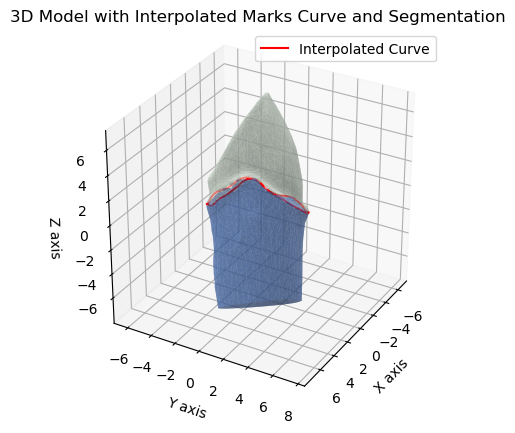

In [4]:
'''
我想用邻域投票法给分割线下的点分配标签。
不同区域的点云密度或许会影响投票的公平性。
这里是在检验牙冠和牙根部分的点云密度是否相等。
结果是不相等，但我仍然打算使用邻域投票法。
'''

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # 添加第一个点到最后，使曲线闭合
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # 找到封闭曲线上的顶点
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        print(f"Trying with tolerance: {tolerance}")
        print(f"Number of inside points: {len(curve_points_indices)}")
        
        # 从图中删除封闭曲线上的点
        G.remove_nodes_from(curve_points_indices)
        
        # 使用图的连通性找到两个区域
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def rotate_points(points, angles):
    """ Rotate points by angles in radians around x, y, z axes. """
    x_angle, y_angle, z_angle = angles

    # Rotation matrices
    Rx = np.array([
        [1, 0, 0],
        [0, np.cos(x_angle), -np.sin(x_angle)],
        [0, np.sin(x_angle), np.cos(x_angle)]
    ])

    Ry = np.array([
        [np.cos(y_angle), 0, np.sin(y_angle)],
        [0, 1, 0],
        [-np.sin(y_angle), 0, np.cos(y_angle)]
    ])

    Rz = np.array([
        [np.cos(z_angle), -np.sin(z_angle), 0],
        [np.sin(z_angle), np.cos(z_angle), 0],
        [0, 0, 1]
    ])

    # Combined rotation matrix
    R = Rz @ Ry @ Rx
    return points @ R.T

def calculate_area(vertices, faces):
    total_area = 0
    vertices = np.array(vertices)
    for face in faces:
        if len(face) == 3:
            v0, v1, v2 = vertices[face[0]], vertices[face[1]], vertices[face[2]]
            a = np.linalg.norm(v1 - v0)
            b = np.linalg.norm(v2 - v1)
            c = np.linalg.norm(v0 - v2)
            s = (a + b + c) / 2
            area = np.sqrt(s * (s - a) * (s - b) * (s - c))
            total_area += area
    return total_area

def plot_surface_with_marks(vertices, faces, marks, part1, part2, inside_points, angles=(0, 0, 0)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    vertices = np.array(vertices)
    faces = np.array(faces)

    # Apply rotation
    vertices = rotate_points(vertices, angles)

    x, y, z = vertices.T

    try:
        # 标记分割的点云部分
        part1_faces = [face for face in faces if set(face) & part1]
        part2_faces = [face for face in faces if set(face) & part2]
        
        part1_faces = np.array(part1_faces)
        part2_faces = np.array(part2_faces)
        
        if len(part1_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part1_faces, color='cornflowerblue', alpha=0.6)
        if len(part2_faces) > 0:
            ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=part2_faces, color='honeydew', alpha=0.6)

    except ValueError as e:
        print(f"ValueError: {e}")
        return

    # 插值标记点并绘制曲线
    interpolated_marks = interpolate_marks(marks)
    interpolated_marks = rotate_points(interpolated_marks, angles)
    ax.plot(interpolated_marks[:, 0], interpolated_marks[:, 1], interpolated_marks[:, 2], c='red', label='Interpolated Curve')
    
    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Model with Interpolated Marks Curve and Segmentation')

    # 添加图例
    ax.legend()

    # 确保坐标轴刻度一致
    max_range = np.array([max(x)-min(x), max(y)-min(y), max(z)-min(z)]).max()
    mid_x = (max(x) + min(x)) * 0.5
    mid_y = (max(y) + min(y)) * 0.5
    mid_z = (max(z) + min(z)) * 0.5
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

    # 设置视角
    ax.view_init(elev=30, azim=30)  # This will be overridden by rotation

    # 确保坐标轴比例相等
    ax.set_box_aspect([1,1,1])  # Aspect ratio is 1:1:1

    # 启用交互式旋转
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/已完成预处理的原始数据/150颗/60.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/已完成预处理的原始数据/150颗/60.obj.mark'

vertices, faces = load_obj_file(obj_file_path)
marks = load_mark_file(mark_file_path)

# 将顶点坐标平移至包围盒中心
centered_vertices = center_vertices(vertices)

# 获取插值后的标记点
interpolated_marks = interpolate_marks(marks)

# 分割点云
part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

# 输出每个部分的点数
print(f"Number of vertices in part 1: {len(part1)}")
print(f"Number of vertices in part 2: {len(part2)}")

# 计算每个部分的总面积
part1_faces = [face for face in faces if set(face) & part1]
part2_faces = [face for face in faces if set(face) & part2]

part1_area = calculate_area(centered_vertices, part1_faces)
part2_area = calculate_area(centered_vertices, part2_faces)

print(f"Total area of part 1: {part1_area:.2f}")
print(f"Total area of part 2: {part2_area:.2f}")

# 计算点云密度（点数/总面积）
part1_density = len(part1) / part1_area if part1_area > 0 else 0
part2_density = len(part2) / part2_area if part2_area > 0 else 0

print(f"Point cloud density of part 1: {part1_density:.2f}")
print(f"Point cloud density of part 2: {part2_density:.2f}")

# 调整视角 (angles in radians)
plot_surface_with_marks(centered_vertices, faces, marks, part1, part2, inside_points, angles=(np.radians(90), np.radians(-30), np.radians(30)))


<IPython.core.display.Javascript object>


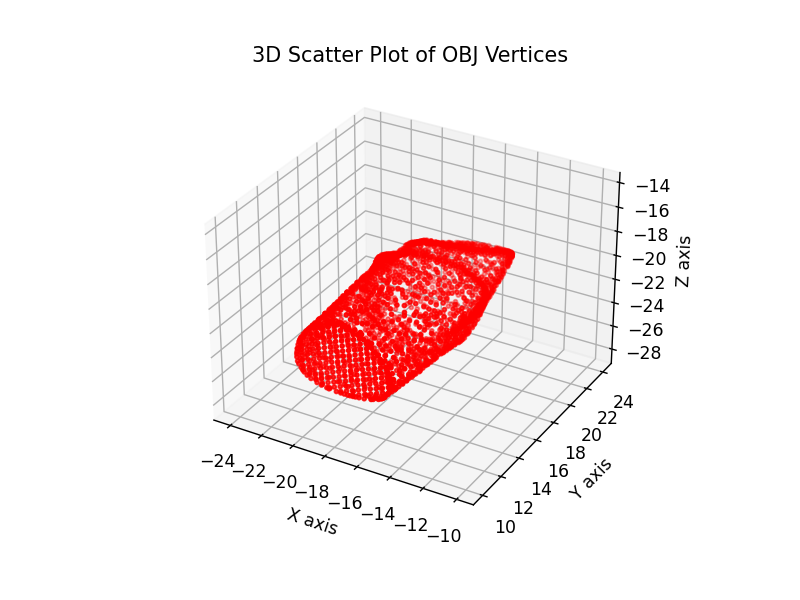

In [11]:
'''
确认了一下，点云底部也有点，不同区域的点云密度确实不同。
'''

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def load_obj_file(file_path):
    vertices = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices

def plot_vertices(vertices):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    vertices = np.array(vertices)
    ax.scatter(vertices[:, 0], vertices[:, 1], vertices[:, 2], c='red', marker='.')
    
    # 设置标签和标题
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Scatter Plot of OBJ Vertices')
    
    # 确保坐标轴刻度一致
    max_range = np.array([vertices[:, 0].max() - vertices[:, 0].min(), 
                          vertices[:, 1].max() - vertices[:, 1].min(), 
                          vertices[:, 2].max() - vertices[:, 2].min()]).max()
    mid_x = (vertices[:, 0].max() + vertices[:, 0].min()) * 0.5
    mid_y = (vertices[:, 1].max() + vertices[:, 1].min()) * 0.5
    mid_z = (vertices[:, 2].max() + vertices[:, 2].min()) * 0.5
    ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
    ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
    ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)
    
    plt.show()

# 使用修正后的文件路径
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/已完成预处理的原始数据/150颗/60.obj'
vertices = load_obj_file(obj_file_path)
plot_vertices(vertices)


In [43]:
'''
三分类，0表示分割线，1和2则是分割出的两个部分。
将来可以把0类归入其他类，以便用各部分边界定义分割线。
'''

import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # Add first point to last to close the curve
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # Find vertices on the closed curve
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        # print(f"Trying with tolerance: {tolerance}")
        # print(f"Number of inside points: {len(curve_points_indices)}")
        
        # Remove the points on the closed curve from the graph
        G.remove_nodes_from(curve_points_indices)
        
        # Find two regions using connected components
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def save_labeled_point_cloud(vertices, labels, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for i, vertex in enumerate(vertices):
            label = labels[i]
            file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {label}\n")

def process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path):
    vertices, faces = load_obj_file(obj_file_path)
    marks = load_mark_file(mark_file_path)

    # Center vertices
    centered_vertices = center_vertices(vertices)

    # Get interpolated marks
    interpolated_marks = interpolate_marks(marks)

    # Segment point cloud
    part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

    # Create labels for each vertex
    labels = np.zeros(len(centered_vertices), dtype=int)  # Default to 0 for part1
    for i in part1:
        labels[i] = 1  # Label for part1
    for i in part2:
        labels[i] = 2  # Label for part2

    # Save the labeled point cloud
    save_labeled_point_cloud(centered_vertices, labels, output_file_path)

# Example usage
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj.mark'
output_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60_labeled.txt'

process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path)


Trying with tolerance: 0.1
Number of inside points: 52
Trying with tolerance: 0.12000000000000001
Number of inside points: 77
Trying with tolerance: 0.14
Number of inside points: 99
Trying with tolerance: 0.16
Number of inside points: 135
Trying with tolerance: 0.18
Number of inside points: 149


In [1]:
'''
改为二分类，删除分割线的点。
'''

import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # Add first point to last to close the curve
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # Find vertices on the closed curve
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        # print(f"Trying with tolerance: {tolerance}")
        # print(f"Number of inside points: {len(curve_points_indices)}")
        
        # Remove the points on the closed curve from the graph
        G.remove_nodes_from(curve_points_indices)
        
        # Find two regions using connected components
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def save_labeled_point_cloud(vertices, part1, part2, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for i, vertex in enumerate(vertices):
            if i in part1:
                label = 1  # Label for part1
            elif i in part2:
                label = 2  # Label for part2
            else:
                continue  # Skip vertices that are not in either part
            file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {label}\n")

def process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path):
    vertices, faces = load_obj_file(obj_file_path)
    marks = load_mark_file(mark_file_path)

    # Center vertices
    centered_vertices = center_vertices(vertices)

    # Get interpolated marks
    interpolated_marks = interpolate_marks(marks)

    # Segment point cloud
    part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

    # Save the labeled point cloud
    save_labeled_point_cloud(centered_vertices, part1, part2, output_file_path)

# Example usage
obj_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj'
mark_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60.obj.mark'
output_file_path = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715/150颗/60_labeled.txt'

process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path)


In [ ]:
'''
批量二分类数据，输出的文件夹格式与输入相同。
'''

import os

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # Add first point to last to close the curve
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # Find vertices on the closed curve
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        # print(f"Trying with tolerance: {tolerance}")
        # print(f"Number of inside points: {len(curve_points_indices)}")
        
        # Remove the points on the closed curve from the graph
        G.remove_nodes_from(curve_points_indices)
        
        # Find two regions using connected components
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def save_labeled_point_cloud(vertices, part1, part2, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for i, vertex in enumerate(vertices):
            if i in part1:
                label = 1  # Label for part1
            elif i in part2:
                label = 2  # Label for part2
            else:
                continue  # Skip vertices that are not in either part
            file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {label}\n")

def process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path):
    vertices, faces = load_obj_file(obj_file_path)
    marks = load_mark_file(mark_file_path)

    # Center vertices
    centered_vertices = center_vertices(vertices)

    # Get interpolated marks
    interpolated_marks = interpolate_marks(marks)

    # Segment point cloud
    part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

    # Save the labeled point cloud
    save_labeled_point_cloud(centered_vertices, part1, part2, output_file_path)

def process_directory(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".obj"):
                obj_file_path = os.path.join(root, file)
                mark_file_path = obj_file_path + ".mark"
                relative_path = os.path.relpath(root, input_dir)
                output_subdir = os.path.join(output_dir, relative_path)
                os.makedirs(output_subdir, exist_ok=True)
                output_file_path = os.path.join(output_subdir, os.path.splitext(file)[0] + "_labeled.txt")

                if os.path.exists(mark_file_path):
                    process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path)
                else:
                    print(f"Corresponding mark file not found for: {obj_file_path}")

# 测试/运行
input_dir = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715'
output_dir = r'D:/李娅宁/肩台外侧点-0715/预处理后的数据'

process_directory(input_dir, output_dir)


Trying with tolerance: 0.1
Number of inside points: 46
Trying with tolerance: 0.12000000000000001
Number of inside points: 61
Trying with tolerance: 0.14
Number of inside points: 91
Trying with tolerance: 0.16
Number of inside points: 110
Trying with tolerance: 0.18
Number of inside points: 130
Trying with tolerance: 0.1
Number of inside points: 43
Trying with tolerance: 0.12000000000000001
Number of inside points: 57
Trying with tolerance: 0.14
Number of inside points: 84
Trying with tolerance: 0.16
Number of inside points: 98
Trying with tolerance: 0.18
Number of inside points: 119
Trying with tolerance: 0.1
Number of inside points: 57
Trying with tolerance: 0.12000000000000001
Number of inside points: 78
Trying with tolerance: 0.14
Number of inside points: 89
Trying with tolerance: 0.16
Number of inside points: 105
Trying with tolerance: 0.1
Number of inside points: 41
Trying with tolerance: 0.12000000000000001
Number of inside points: 64
Trying with tolerance: 0.14
Number of inside

In [3]:
'''
把批量处理的输出地址改成同一文件夹下，扁平化。
每次输出后打印图像计数。
'''

import os
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # Add first point to last to close the curve
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # Find vertices on the closed curve
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        # Remove the points on the closed curve from the graph
        G.remove_nodes_from(curve_points_indices)
        
        # Find two regions using connected components
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def save_labeled_point_cloud(vertices, part1, part2, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for i, vertex in enumerate(vertices):
            if i in part1:
                label = 1  # Label for part1
            elif i in part2:
                label = 2  # Label for part2
            else:
                continue  # Skip vertices that are not in either part
            file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {label}\n")

def process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path):
    vertices, faces = load_obj_file(obj_file_path)
    marks = load_mark_file(mark_file_path)

    # Center vertices
    centered_vertices = center_vertices(vertices)

    # Get interpolated marks
    interpolated_marks = interpolate_marks(marks)

    # Segment point cloud
    part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

    # Save the labeled point cloud
    save_labeled_point_cloud(centered_vertices, part1, part2, output_file_path)

def process_directory(input_dir, output_dir):
    count = 1
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".obj"):
                obj_file_path = os.path.join(root, file)
                mark_file_path = obj_file_path + ".mark"
                output_file_name = os.path.splitext(file)[0] + "_labeled.txt"
                output_file_path = os.path.join(output_dir, output_file_name)

                if os.path.exists(mark_file_path):
                    process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path)
                    print(count)
                    count += 1
                else:
                    print(f"Corresponding mark file not found for: {obj_file_path}")

# 测试/运行
input_dir = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715'
output_dir = r'D:/李娅宁/肩台外侧点-0715/预处理后的数据'

os.makedirs(output_dir, exist_ok=True)

process_directory(input_dir, output_dir)


1
2
3
4
5
6
Corresponding mark file not found for: D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715\1\1_6.obj
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
Segmentation failed: Unable to find two separate components.
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235


IndexError: index 0 is out of bounds for axis 0 with size 0

In [4]:
'''
第二轮数据预处理
'''

import os
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # Add first point to last to close the curve
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # Find vertices on the closed curve
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        # Remove the points on the closed curve from the graph
        G.remove_nodes_from(curve_points_indices)
        
        # Find two regions using connected components
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def save_labeled_point_cloud(vertices, part1, part2, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for i, vertex in enumerate(vertices):
            if i in part1:
                label = 1  # Label for part1
            elif i in part2:
                label = 2  # Label for part2
            else:
                continue  # Skip vertices that are not in either part
            file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {label}\n")

def process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path):
    vertices, faces = load_obj_file(obj_file_path)
    marks = load_mark_file(mark_file_path)

    # Center vertices
    centered_vertices = center_vertices(vertices)

    # Get interpolated marks
    interpolated_marks = interpolate_marks(marks)

    # Segment point cloud
    part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

    # Save the labeled point cloud
    save_labeled_point_cloud(centered_vertices, part1, part2, output_file_path)

def process_directory(input_dir, output_dir):
    count = 1
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".obj"):
                obj_file_path = os.path.join(root, file)
                mark_file_path = obj_file_path + ".mark"
                output_file_name = os.path.splitext(file)[0] + "_labeled.txt"
                output_file_path = os.path.join(output_dir, output_file_name)

                if os.path.exists(mark_file_path):
                    process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path)
                    print(count)
                    count += 1
                else:
                    print(f"Corresponding mark file not found for: {obj_file_path}")

# 测试/运行
input_dir = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715'
output_dir = r'D:/李娅宁/肩台外侧点-0715/预处理后的数据'

os.makedirs(output_dir, exist_ok=True)

process_directory(input_dir, output_dir)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


IndexError: index 0 is out of bounds for axis 0 with size 0

In [5]:
'''
第三轮
'''

import os
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # Add first point to last to close the curve
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # Find vertices on the closed curve
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        # Remove the points on the closed curve from the graph
        G.remove_nodes_from(curve_points_indices)
        
        # Find two regions using connected components
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def save_labeled_point_cloud(vertices, part1, part2, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for i, vertex in enumerate(vertices):
            if i in part1:
                label = 1  # Label for part1
            elif i in part2:
                label = 2  # Label for part2
            else:
                continue  # Skip vertices that are not in either part
            file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {label}\n")

def process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path):
    vertices, faces = load_obj_file(obj_file_path)
    marks = load_mark_file(mark_file_path)

    # Center vertices
    centered_vertices = center_vertices(vertices)

    # Get interpolated marks
    interpolated_marks = interpolate_marks(marks)

    # Segment point cloud
    part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

    # Save the labeled point cloud
    save_labeled_point_cloud(centered_vertices, part1, part2, output_file_path)

def process_directory(input_dir, output_dir):
    count = 1
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".obj"):
                obj_file_path = os.path.join(root, file)
                mark_file_path = obj_file_path + ".mark"
                output_file_name = os.path.splitext(file)[0] + "_labeled.txt"
                output_file_path = os.path.join(output_dir, output_file_name)

                if os.path.exists(mark_file_path):
                    process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path)
                    print(count)
                    count += 1
                else:
                    print(f"Corresponding mark file not found for: {obj_file_path}")

# 测试/运行
input_dir = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715'
output_dir = r'D:/李娅宁/肩台外侧点-0715/预处理后的数据'

os.makedirs(output_dir, exist_ok=True)

process_directory(input_dir, output_dir)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
Corresponding mark file not found for: D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715\78\78_10.obj
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
Corresponding mark file not found for: D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715\80\80_10.obj
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118


In [6]:
'''
第四轮，补缺
'''

import os
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # Add first point to last to close the curve
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # Find vertices on the closed curve
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        # Remove the points on the closed curve from the graph
        G.remove_nodes_from(curve_points_indices)
        
        # Find two regions using connected components
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def save_labeled_point_cloud(vertices, part1, part2, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for i, vertex in enumerate(vertices):
            if i in part1:
                label = 1  # Label for part1
            elif i in part2:
                label = 2  # Label for part2
            else:
                continue  # Skip vertices that are not in either part
            file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {label}\n")

def process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path):
    vertices, faces = load_obj_file(obj_file_path)
    marks = load_mark_file(mark_file_path)

    # Center vertices
    centered_vertices = center_vertices(vertices)

    # Get interpolated marks
    interpolated_marks = interpolate_marks(marks)

    # Segment point cloud
    part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

    # Save the labeled point cloud
    save_labeled_point_cloud(centered_vertices, part1, part2, output_file_path)

def process_directory(input_dir, output_dir):
    count = 1
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".obj"):
                obj_file_path = os.path.join(root, file)
                mark_file_path = obj_file_path + ".mark"
                output_file_name = os.path.splitext(file)[0] + "_labeled.txt"
                output_file_path = os.path.join(output_dir, output_file_name)

                if os.path.exists(mark_file_path):
                    process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path)
                    print(count)
                    count += 1
                else:
                    print(f"Corresponding mark file not found for: {obj_file_path}")

# 测试/运行
input_dir = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715'
output_dir = r'D:/李娅宁/肩台外侧点-0715/预处理后的数据'

os.makedirs(output_dir, exist_ok=True)

process_directory(input_dir, output_dir)


1
2
3
4
5
6
7
8
9


In [10]:
'''
第五轮，检查争议数据
'''

import os
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # Add first point to last to close the curve
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # Find vertices on the closed curve
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        # Remove the points on the closed curve from the graph
        G.remove_nodes_from(curve_points_indices)
        
        # Find two regions using connected components
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("Segmentation failed: Unable to find two separate components.")
    return set(), set(), set()

def save_labeled_point_cloud(vertices, part1, part2, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for i, vertex in enumerate(vertices):
            if i in part1:
                label = 1  # Label for part1
            elif i in part2:
                label = 2  # Label for part2
            else:
                continue  # Skip vertices that are not in either part
            file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {label}\n")

def process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path):
    vertices, faces = load_obj_file(obj_file_path)
    marks = load_mark_file(mark_file_path)

    # Center vertices
    centered_vertices = center_vertices(vertices)

    # Get interpolated marks
    interpolated_marks = interpolate_marks(marks)

    # Segment point cloud
    part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

    # Save the labeled point cloud
    save_labeled_point_cloud(centered_vertices, part1, part2, output_file_path)

def process_directory(input_dir, output_dir):
    count = 1
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".obj"):
                obj_file_path = os.path.join(root, file)
                mark_file_path = obj_file_path + ".mark"
                output_file_name = os.path.splitext(file)[0] + "_labeled.txt"
                output_file_path = os.path.join(output_dir, output_file_name)

                if os.path.exists(mark_file_path):
                    process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path)
                    print(count)
                    count += 1
                else:
                    print(f"Corresponding mark file not found for: {obj_file_path}")

# 测试/运行
input_dir = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715'
output_dir = r'D:/李娅宁/肩台外侧点-0715/预处理后的数据'

os.makedirs(output_dir, exist_ok=True)

process_directory(input_dir, output_dir)


Segmentation failed: Unable to find two separate components.
1


In [ ]:
'''
重做预处理，以邻域投票法为轮廓线上的点赋予标签
'''

import os
import numpy as np
from scipy.interpolate import splprep, splev
import networkx as nx
from sklearn.neighbors import KDTree

def load_obj_file(file_path):
    vertices = []
    faces = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                if line.startswith('v '):
                    parts = line.strip().split()
                    vertex = [float(parts[1]), float(parts[2]), float(parts[3])]
                    vertices.append(vertex)
                elif line.startswith('f '):
                    parts = line.strip().split()
                    face = [int(p.split('/')[0]) - 1 for p in parts[1:]]
                    faces.append(face)
    except FileNotFoundError:
        print(f"文件未找到: {file_path}")
    except Exception as e:
        print(f"发生错误: {e}")
    return vertices, faces

def load_mark_file(file_path):
    marks = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                parts = line.strip().split()
                if len(parts) == 3:
                    mark = [float(parts[0]), float(parts[1]), float(parts[2])]
                    marks.append(mark)
    except FileNotFoundError:
        print(f"文件未找到: {file_path}")
    except Exception as e:
        print(f"发生错误: {e}")
    return marks

def center_vertices(vertices):
    vertices_array = np.array(vertices)
    min_coords = vertices_array.min(axis=0)
    max_coords = vertices_array.max(axis=0)
    center = (min_coords + max_coords) / 2
    centered_vertices = vertices_array - center
    return centered_vertices.tolist()

def interpolate_marks(marks, num_points=100):
    marks = np.array(marks)
    marks = np.vstack([marks, marks[0]])  # 添加第一个点到最后，使曲线闭合
    tck, u = splprep(marks.T, s=0, per=True)
    u_fine = np.linspace(0, 1, num_points)
    interpolated_marks = splev(u_fine, tck)
    return np.array(interpolated_marks).T

def generate_graph(vertices, faces):
    G = nx.Graph()
    for i, vertex in enumerate(vertices):
        G.add_node(i, pos=vertex)
    for face in faces:
        for i in range(len(face)):
            G.add_edge(face[i], face[(i+1) % len(face)])
    return G

def is_on_curve(vertex, curve_points, tolerance):
    for point in curve_points:
        if np.linalg.norm(vertex - point) < tolerance:
            return True
    return False

def segment_point_cloud(vertices, faces, interpolated_marks):
    tolerance = 0.1
    max_tolerance = 1.0
    tolerance_increment = 0.02

    while tolerance <= max_tolerance:
        G = generate_graph(vertices, faces)
        curve_points = np.array(interpolated_marks)
        
        # 找到封闭曲线上的顶点
        curve_points_indices = set()
        for i, vertex in enumerate(vertices):
            if is_on_curve(np.array(vertex), curve_points, tolerance):
                curve_points_indices.add(i)
        
        # 从图中删除封闭曲线上的点
        G.remove_nodes_from(curve_points_indices)
        
        # 使用图的连通性找到两个区域
        components = list(nx.connected_components(G))
        part1 = set()
        part2 = set()
        
        if len(components) > 1:
            part1 = components[0]
            part2 = components[1]
            return part1, part2, curve_points_indices
        else:
            tolerance += tolerance_increment
    
    print("分割失败：无法找到两个独立的组件。")
    return set(), set(), set()

def perform_voting(vertices, part1, part2):
    # 创建 KDTree 以高效地查找邻域
    vertices_array = np.array(vertices)
    tree = KDTree(vertices_array)
    
    # 创建标签数组
    labels = np.zeros(len(vertices), dtype=int)
    labels[list(part1)] = 1
    labels[list(part2)] = 2
    
    # 创建一个临时标签数组用于存储投票结果
    temp_labels = np.zeros(len(vertices), dtype=int)
    
    # 设置邻域半径的初始值和最大值
    r_min = 0.2
    r_max = 1
    r_increment = 0.2
    
    # 对每个点进行投票
    for i, vertex in enumerate(vertices):
        if i in part1 or i in part2:
            continue  # 跳过已经标记的点
        
        # 初始化邻域半径
        r = r_min
        found_valid_neighbor = False
        
        while r <= r_max:
            # 查找邻居
            neighbors = tree.query_radius([vertex], r=r)[0]
            if len(neighbors) > 2:
                found_valid_neighbor = True
                break
            r += r_increment
        
        if not found_valid_neighbor:
            # 如果没有找到有效邻居，跳过该点
            continue
        
        # 如果找到有效邻居，进行标签投票
        neighbor_labels = labels[neighbors]
        
        # 计算每个类别的邻居数量
        num_part1_neighbors = np.sum(neighbor_labels == 1)
        num_part2_neighbors = np.sum(neighbor_labels == 2)
        
        # 投票决策
        if num_part1_neighbors > num_part2_neighbors:
            temp_labels[i] = 1
        elif num_part2_neighbors > num_part1_neighbors:
            temp_labels[i] = 2
        else:
            # 如果邻居类别数量相等，选择距离最近的邻居的类别
            distances = np.linalg.norm(vertices_array[neighbors] - vertex, axis=1)
            closest_neighbor_index = np.argmin(distances)
            temp_labels[i] = labels[neighbors][closest_neighbor_index]
    
    # 更新最终标签
    labels[temp_labels > 0] = temp_labels[temp_labels > 0]
    
    return labels

def save_labeled_point_cloud(vertices, labels, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for i, vertex in enumerate(vertices):
            if labels[i] > 0:  # 仅保存已标记的点
                file.write(f"{vertex[0]} {vertex[1]} {vertex[2]} {labels[i]}\n")

def process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path):
    vertices, faces = load_obj_file(obj_file_path)
    marks = load_mark_file(mark_file_path)

    # print(f"加载的点数: {len(vertices)}")
    
    # 中心化顶点
    centered_vertices = center_vertices(vertices)

    # 获取插值标记点
    interpolated_marks = interpolate_marks(marks)

    # 分割点云
    part1, part2, inside_points = segment_point_cloud(centered_vertices, faces, interpolated_marks)

    # print(f"part1 点数: {len(part1)}")
    # print(f"part2 点数: {len(part2)}")
    # print(f"轮廓线上的点数: {len(inside_points)}")

    # 执行投票并保存标记的点云
    labels = perform_voting(centered_vertices, part1, part2)
    save_labeled_point_cloud(centered_vertices, labels, output_file_path)

    # 打印输出到 txt 文件的点数
    output_count = sum(1 for line in open(output_file_path))
    
    # 返回统计信息
    return len(vertices), len(inside_points), output_count

def process_directory(input_dir, output_dir):
    count = 1
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(".obj"):
                obj_file_path = os.path.join(root, file)
                mark_file_path = obj_file_path + ".mark"
                output_file_name = os.path.splitext(file)[0] + "_labeled.txt"
                output_file_path = os.path.join(output_dir, output_file_name)

                if os.path.exists(mark_file_path):
                    # 处理并保存点云，获取统计信息
                    vertices_count, inside_points_count, output_count = process_and_save_point_cloud(obj_file_path, mark_file_path, output_file_path)
                    
                    # 打印统计信息
                    # print(f"处理文件计数: {count}")
                    # print(f"加载的点云点数: {vertices_count}")
                    # print(f"轮廓线上的点数: {inside_points_count}")
                    print(f"输出到 TXT 文件的点数: {output_count}")
                    
                    if vertices_count != output_count:
                        print(f"输入输出点云数量差: {vertices_count - output_count}")
                    
                    count += 1
                else:
                    print(f"未找到对应的标记文件: {obj_file_path}")

# 测试/运行
input_dir = r'D:/李娅宁/肩台外侧点-0715/肩台外侧点-0715'
output_dir = r'D:/李娅宁/肩台外侧点-0715/重新处理后的数据'

os.makedirs(output_dir, exist_ok=True)

process_directory(input_dir, output_dir)


加载的点数: 4556
part1 点数: 2352
part2 点数: 2074
轮廓线上的点数: 130
输出到 TXT 文件的点数: 4556
处理文件计数: 1
加载的点数: 4556


In [ ]:
'''
辅助工具，用于查看输出txt文件的点云及其分类情况。
'''

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 开启交互旋转
%matplotlib notebook

def read_txt_file(file_path):
    # 读取包含四列的数据
    data = np.loadtxt(file_path, usecols=(0, 1, 2, 3))
    return data

def plot_scatter_3d(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x = data[:, 0]
    y = data[:, 1]
    z = data[:, 2]
    labels = data[:, 3]
    
    # 根据标签创建颜色映射
    unique_labels = np.unique(labels)
    colors = plt.cm.jet(np.linspace(0, 1, len(unique_labels)))
    label_to_color = {label: color for label, color in zip(unique_labels, colors)}
    
    # 为每个点分配颜色
    point_colors = np.array([label_to_color[label] for label in labels])
    
    ax.scatter(x, y, z, c=point_colors, marker='.')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    
    plt.show()

# 文件路径
file_path = r'D:/李娅宁/肩台外侧点-0715/重新处理后的数据/1_1_labeled.txt'

# 读取数据
data = read_txt_file(file_path)

# 绘制散点图
plot_scatter_3d(data)
